# Practice Project 7 - Big Data Mart Sales Problem

## Importing necessary libraries

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
import joblib

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [180]:
df_train = pd.read_csv('bigdatamart_Train.csv')
df_test = pd.read_csv('bigdatamart_Test.csv')

In [181]:
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [182]:
df_test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


## Dataset Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
<br><br>
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

**Features:**

1. Item_Identifier : ID of item
2. Item_Weight : Weight of item
3. Item_Fat_Content : Fat content of the item
4. Item_Visibility: Estimates the customer reach of the item
5. Item_Type : Type of item
6. Item_MRP : Maximum Retail Price of Item
7. Outlet_Identifier : ID of Retail Outlet
8. Outlet_Establishment_Year : Year in which Retail Outlet was established
9. Outlet_Size : Size of Outlet
10. Outlet_Location_Type : The tier of the city where the Retail outlet is located
11. Outlet_Type : whether grocery store or a type of supermarket

**Label/Target:**

- Item_Outlet_Sales: The total sales made by an outlet

## EDA

In [183]:
df_train.shape

(8523, 12)

In [184]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Findings:**
1. "Item_Weight" has 1463 null values (i.e. 17.17% of the dataset)
2. "Outlet_Size" has 2410 null values (i.e. 28.28% of the dataset)

In [185]:
df_test.shape

(5681, 11)

In [186]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**Findings:**
1. "Item_Weight" has 976 null values (i.e. 17.18% of the dataset)
2. "Outlet_Size" has 1606 null values (i.e. 28.27% of the dataset)

In [187]:
(df_train==0).sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [188]:
(df_test==0).sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              353
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [189]:
df_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [190]:
df_test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

**Observations:**
1. Item_Fat_Content - 5 unique categories
2. Item_Type - 16 unique categories
3. Outlet_Identifier - 10 unique categories
4. Outlet_Establishment_Year - 9 unique discrete values
5. Outlet_Size - 3 unique categories
6. Outlet_Location_Type - 3 unique categories
7. Outlet_Type - 4 unique categories

In [191]:
df_train.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [192]:
df_test.skew()

Item_Weight                  0.129975
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

In [193]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [194]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [195]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [196]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


## Filling null values

### Item Weight

In [197]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [198]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [199]:
df_train['Item_Weight'].head(10)

0     9.300
1     5.920
2    17.500
3    19.200
4     8.930
5    10.395
6    13.650
7       NaN
8    16.200
9    19.200
Name: Item_Weight, dtype: float64

In [200]:
df_test['Item_Weight'].head(10)

0    20.750
1     8.300
2    14.600
3     7.315
4       NaN
5     9.800
6    19.350
7       NaN
8     6.305
9     5.985
Name: Item_Weight, dtype: float64

<AxesSubplot:xlabel='Item_Weight'>

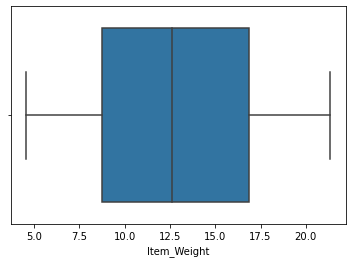

In [201]:
# checking for outliers
sns.boxplot(df_train['Item_Weight'])

<AxesSubplot:xlabel='Item_Weight'>

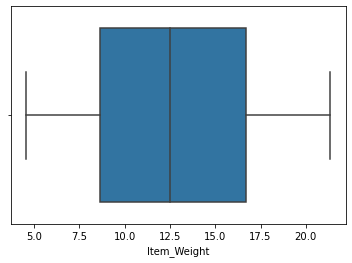

In [202]:
sns.boxplot(df_test['Item_Weight'])

`There appear to be no outliers in the train/test data`

However, Item_Weight has an obvious relation to "Item_Type". Thus, filling in the null values using mean of "Item_Weight" must pertain to their respective "Item_Type".

In [203]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [204]:
df_test['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [205]:
mean_wt = df_test.groupby('Item_Type').agg({'Item_Weight':'mean'})
mean_wt1 = df_train.groupby('Item_Type').agg({'Item_Weight':'mean'})

In [206]:
mean_wt1

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [207]:
mean_wt

,Item_Weight
Item_Type,
Baking Goods,12.272418
Breads,10.866799
Breakfast,13.759603
Canned,12.393565
Dairy,12.955040
Frozen Foods,12.101543
Fruits and Vegetables,13.146659
Hard Drinks,11.844417
Health and Hygiene,13.216929


In [208]:
mean_wt1.index

Index(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
      dtype='object', name='Item_Type')

In [209]:
mean_wt.index

Index(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
      dtype='object', name='Item_Type')

In [210]:
meanwt1dt = dict(zip(mean_wt1.index,mean_wt1.Item_Weight))

In [211]:
meanwtdt = dict(zip(mean_wt.index,mean_wt.Item_Weight))

In [212]:
df_train['meanwt1'] = df_train['Item_Type'].map(meanwt1dt)

In [213]:
df_test['meanwt'] = df_test['Item_Type'].map(meanwtdt)

In [214]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,meanwt1
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,13.426069
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11.847460
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,12.817344
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,13.224769
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,13.384736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,12.987880
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,12.277108
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,13.142314
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12.987880


In [215]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,meanwt
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,12.684256
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,12.955040
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,14.009725
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,12.684256
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,12.955040
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,12.684256
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,13.618247
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,13.216929
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,12.393565


In [216]:
df_train['Item_Weight'] = df_train['Item_Weight'].replace('None', np.nan)

In [217]:
df_train['Item_Weight'] = df_train['Item_Weight'].fillna((df_train['meanwt1']))

In [218]:
df_test['Item_Weight'] = df_test['Item_Weight'].replace('None', np.nan)

In [219]:
df_test['Item_Weight'] = df_test['Item_Weight'].fillna((df_test['meanwt']))

In [220]:
df_train.drop(columns = ['meanwt1'],inplace=True)

In [221]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [222]:
df_test.drop(columns='meanwt',inplace=True)

In [223]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Outlet_Size

In [224]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [225]:
df_test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [226]:
df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])

In [227]:
df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0])

In [228]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [229]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## Dropping irrelevant columns

It appears that "Item_Identifier" is a product code and will have no relevance to predicting the target, i.e. sales

In [230]:
df_train.drop(columns = ['Item_Identifier'],inplace=True)
df_test.drop(columns = ['Item_Identifier'],inplace=True)

## Analysis of features

In [231]:
df_train.nunique()

Item_Weight                   431
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

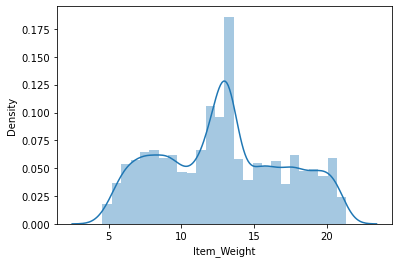

In [232]:
sns.distplot(df_train.Item_Weight )

Data looks normally distributed

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

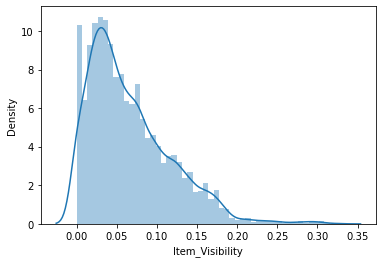

In [233]:
sns.distplot(df_train.Item_Visibility)

Data distribution is right skewed

In [234]:
df_train.Item_Visibility.skew()

1.1670905496918396

In [235]:
(df_train.Item_Visibility==0).sum()

526

<AxesSubplot:xlabel='Item_Visibility'>

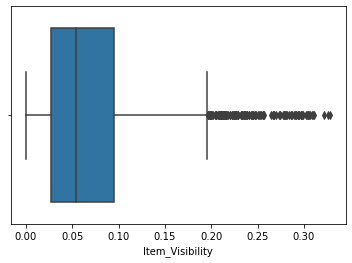

In [236]:
sns.boxplot(df_train.Item_Visibility)

Too many outliers exist. Using z score to remove outliers

In [237]:
df2 = df_train.Item_Visibility.copy()

In [238]:
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3)]

In [239]:
df2.shape

(8523,)

In [240]:
df3.shape

(8428,)

In [241]:
# calculating data loss
(8523-8428)/8523*100

1.1146309984747156

Which is an acceptable amount of data loss.

In [242]:
dropindx = df_train.index.difference(df3.index)

In [243]:
df_train.drop(dropindx,inplace = True)

<AxesSubplot:xlabel='Item_Visibility'>

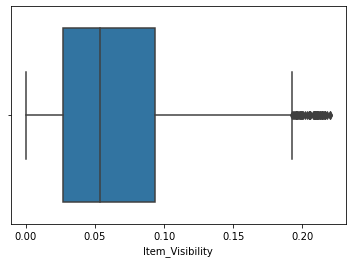

In [244]:
sns.boxplot(df_train.Item_Visibility)

It appears some outliers have been removed.

In [245]:
df_train.skew()

Item_Weight                  0.088761
Item_Visibility              0.795956
Item_MRP                     0.128945
Outlet_Establishment_Year   -0.409186
Item_Outlet_Sales            1.173070
dtype: float64

`Imputing 0 values using simple imputer with a median strategy`

In [246]:
si = SimpleImputer(missing_values = 0,strategy = 'median',verbose = 0 )

In [247]:
si = si.fit(df_train[['Item_Visibility']])

In [248]:
df_train[['Item_Visibility']] = si.transform(df_train[['Item_Visibility']])

In [249]:
(df_train==0).sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [250]:
si = SimpleImputer(missing_values = 0,strategy = 'median',verbose = 0 )

In [251]:
Si = si.fit(df_test[['Item_Visibility']])

In [252]:
df_test[['Item_Visibility']] = Si.transform(df_test[['Item_Visibility']])

In [253]:
(df_test==0).sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [254]:
df_test.Item_Visibility.skew()

1.395046074467687

Removing outliers in test data using z score

In [255]:
df2 = df_test.Item_Visibility.copy()

In [256]:
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3)]

In [257]:
df2.shape

(5681,)

In [258]:
df3.shape

(5594,)

In [259]:
# calculating the data loss
(5681-5594)/5681 *100

1.531420524555536

which is an acceptable amount of data loss

In [260]:
dropindx = df_test.index.difference(df3.index)

In [261]:
df_test.drop(dropindx,inplace = True)

In [262]:
df_test.shape

(5594, 10)

In [263]:
df_train.reset_index(drop=True,inplace=True)

In [264]:
df_test.reset_index(drop=True,inplace=True)

#### Using Power Transformer to reduce skewness

In [265]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)

In [266]:
df4 = df_train[['Item_Visibility']]

In [267]:
trans = pt.fit_transform(df4[['Item_Visibility']])

In [268]:
trans = pd.DataFrame(trans, columns=df4.columns)

In [269]:
trans.skew()

Item_Visibility    0.132488
dtype: float64

In [270]:
trans.index = df_train.index

In [271]:
df_train[['Item_Visibility']]= trans[['Item_Visibility']]

In [272]:
df_train.Item_Visibility.skew()

0.1324881487813592

It appears skewness has been reduced significantly.

In [273]:
df5 = df_test[['Item_Visibility']]

In [274]:
trans = pt.fit_transform(df5[['Item_Visibility']])

In [275]:
trans = pd.DataFrame(trans, columns=df5.columns)

In [276]:
trans.skew()

Item_Visibility    0.119684
dtype: float64

In [277]:
trans.index = df_test.index

In [278]:
df_test[['Item_Visibility']]= trans[['Item_Visibility']]

In [279]:
df_test.skew()

Item_Weight                  0.140870
Item_Visibility              0.119684
Item_MRP                     0.133769
Outlet_Establishment_Year   -0.412076
dtype: float64

### Item MRP

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

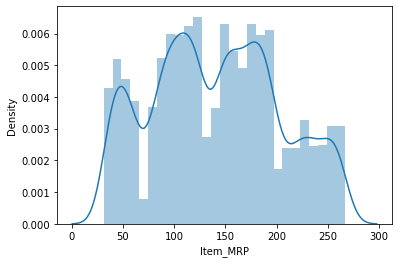

In [280]:
sns.distplot(df_train.Item_MRP )

It appears that the distribution is multi-modal

<AxesSubplot:xlabel='Item_MRP'>

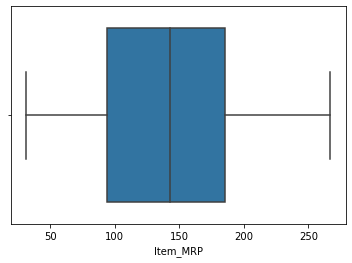

In [281]:
sns.boxplot(df_train.Item_MRP)

Also, there are no outliers

### Outlet Establishment Year

In [282]:
df_train.Outlet_Establishment_Year.value_counts()

1985    1410
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     513
Name: Outlet_Establishment_Year, dtype: int64

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

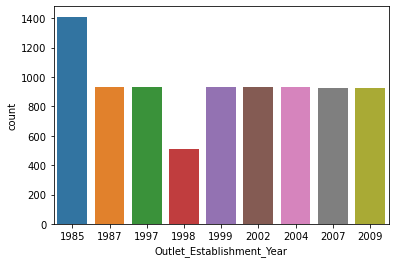

In [283]:
sns.countplot(df_train.Outlet_Establishment_Year)

**Findings:**
1. Max no. of outlets were established in 1985
2. Min no. of outlets were established in 1998
3. Other years - 1987, 1997, 1999, 2002, 2004, 2007, 2009 - saw similar no. of establishments each year

#### Creating "Age" from "Outlet_Establishment_Year" to gain better insights into its relevance an relationship with target column

In [284]:
df_train['Age'] = df_train['Outlet_Establishment_Year'].apply(lambda y: 2013 - y) 
df_test['Age'] = df_test['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 

In [285]:
df_train.drop(columns=['Outlet_Establishment_Year'],inplace=True)
df_test.drop(columns=['Outlet_Establishment_Year'],inplace=True)

In [286]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,9.30,Low Fat,-1.442725,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,5.92,Regular,-1.309692,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,17.50,Low Fat,-1.412983,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,19.20,Regular,-0.051106,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,15
4,8.93,Low Fat,-0.051106,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26


In [287]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age
0,20.75000,Low Fat,-1.833918,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,14
1,8.30000,reg,-0.608874,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,6
2,14.60000,Low Fat,0.930118,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store,15
3,7.31500,Low Fat,-1.485170,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,6
4,12.95504,Regular,1.248922,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,28


In [288]:
df_train.Age.value_counts()

28    1410
26     932
16     930
9      930
14     930
11     929
4      928
6      926
15     513
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

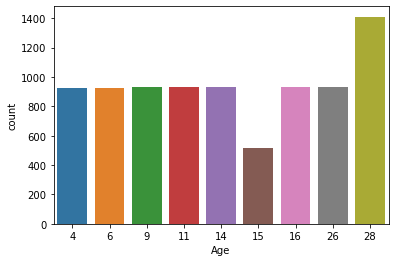

In [289]:
sns.countplot(df_train.Age)

### Item_Fat_Content

In [290]:
df_train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

It appears that "Item_Fat_Content" has only 2 unique categories, but due to variation in names, different categories are evident.

We will convert the different variations of the same category into unique values.

In [291]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'})

In [292]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'})

In [293]:
df_train.Item_Fat_Content.value_counts()

Low Fat    5463
Regular    2965
Name: Item_Fat_Content, dtype: int64

In [294]:
df_test.Item_Fat_Content.value_counts()

Low Fat    3622
Regular    1972
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

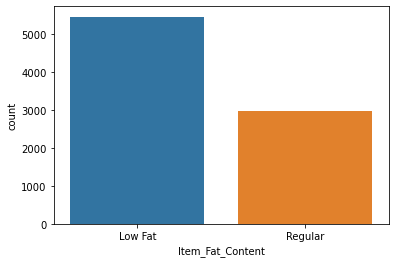

In [295]:
sns.countplot(df_train.Item_Fat_Content)

### Item Type

In [296]:
df_train.Item_Type.value_counts()

Fruits and Vegetables    1218
Snack Foods              1185
Household                 903
Frozen Foods              846
Dairy                     672
Canned                    644
Baking Goods              640
Health and Hygiene        517
Soft Drinks               441
Meat                      420
Breads                    248
Hard Drinks               212
Others                    169
Starchy Foods             145
Breakfast                 107
Seafood                    61
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

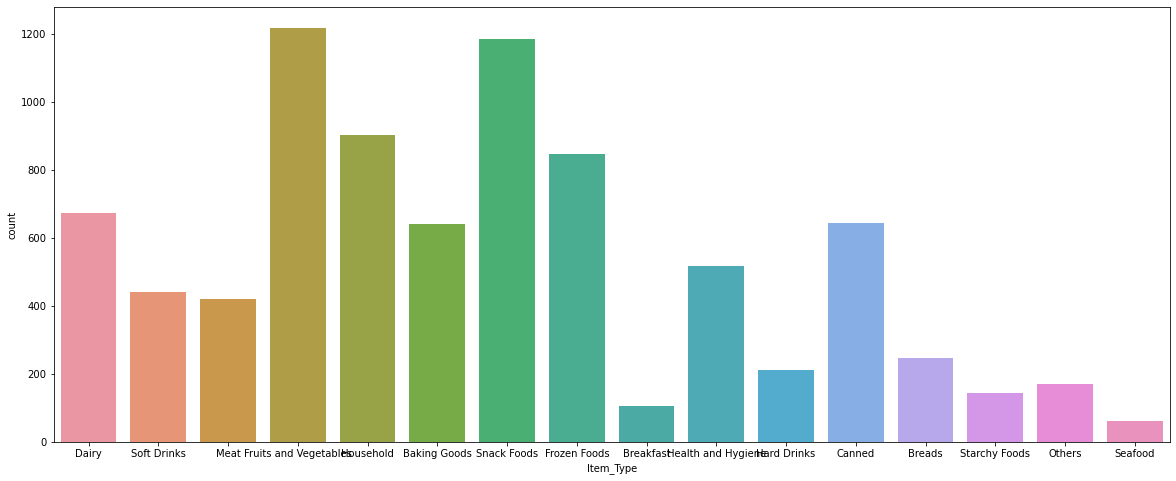

In [297]:
plt.figure(figsize=(20,8))
sns.countplot(df_train.Item_Type)

#### Converting the 16 Item Types into broader Item Types
1. Dairy - Foods
2. Soft Drinks - Beverages
3. Meat - Foods
4. Fruits and Vegetables - Foods
5. Household - Inedibles
6. Baking Goods - Foods
7. Snack Foods - Foods
8. Frozen Foods - Foods
9. Breakfast - Foods
10. Health and Hygiene - Inedibles
11. Hard Drinks - Beverages
12. Canned - Foods
13. Breads - Foods
14. Starchy Foods - Foods
15. Others - Inedibles
16. Seafood - Foods

Thus, the broad categories of Item Types are as follows:
1. Foods
2. Beverages
3. Inedibles

In [298]:
df_train['Item_Type'] = df_train['Item_Type'].replace({'Dairy':'Foods',
                                                       'Soft Drinks':'Beverages',
                                                       'Meat':'Foods',
                                                       'Fruits and Vegetables':'Foods',
                                                       'Household':'Inedibles',
                                                       'Baking Goods':'Foods',
                                                       'Snack Foods':'Foods',
                                                       'Frozen Foods':'Foods',
                                                       'Breakfast':'Foods',
                                                       'Health and Hygiene':'Inedibles',
                                                       'Hard Drinks':'Beverages',
                                                       'Canned':'Foods',
                                                       'Breads':'Foods',
                                                       'Starchy Foods':'Foods',
                                                       'Others':'Inedibles',
                                                       'Seafood':'Foods'})

In [299]:
df_test['Item_Type'] = df_test['Item_Type'].replace({'Dairy':'Foods',
                                                       'Soft Drinks':'Beverages',
                                                       'Meat':'Foods',
                                                       'Fruits and Vegetables':'Foods',
                                                       'Household':'Inedibles',
                                                       'Baking Goods':'Foods',
                                                       'Snack Foods':'Foods',
                                                       'Frozen Foods':'Foods',
                                                       'Breakfast':'Foods',
                                                       'Health and Hygiene':'Inedibles',
                                                       'Hard Drinks':'Beverages',
                                                       'Canned':'Foods',
                                                       'Breads':'Foods',
                                                       'Starchy Foods':'Foods',
                                                       'Others':'Inedibles',
                                                       'Seafood':'Foods'})

However, "Item_Fat_Content" will not be applicable to Inedibles. Therefore, we create a separate category for them.

In [300]:
df_train.loc[df_train['Item_Type']=="Inedibles",'Item_Fat_Content'] = "Inedible"

In [301]:
df_test.loc[df_test['Item_Type']=="Inedibles",'Item_Fat_Content'] = "Inedible"

In [302]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,9.300,Low Fat,-1.442725,Foods,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,5.920,Regular,-1.309692,Beverages,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4
2,17.500,Low Fat,-1.412983,Foods,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,19.200,Regular,-0.051106,Foods,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,15
4,8.930,Inedible,-0.051106,Inedibles,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...,...
8423,6.865,Low Fat,-0.054236,Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,26
8424,8.380,Regular,-0.336739,Foods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,549.2850,11
8425,10.600,Inedible,-0.716902,Inedibles,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,9
8426,7.210,Regular,1.556591,Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,4


In [303]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age
0,20.75000,Low Fat,-1.833918,Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,14
1,8.30000,Regular,-0.608874,Foods,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,6
2,14.60000,Inedible,0.930118,Inedibles,241.7538,OUT010,Medium,Tier 3,Grocery Store,15
3,7.31500,Low Fat,-1.485170,Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,6
4,12.95504,Regular,1.248922,Foods,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,28
...,...,...,...,...,...,...,...,...,...,...
5589,10.50000,Regular,-1.566897,Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1,16
5590,7.60000,Regular,1.581831,Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2,4
5591,10.00000,Inedible,0.386391,Inedibles,118.7440,OUT045,Medium,Tier 2,Supermarket Type1,11
5592,15.30000,Regular,-0.012140,Foods,214.6218,OUT017,Medium,Tier 2,Supermarket Type1,6


### Outlet Size

In [304]:
df_train.Outlet_Size.value_counts()

Medium    5161
Small     2335
High       932
Name: Outlet_Size, dtype: int64

### Outlet Location Type

In [305]:
df_train.Outlet_Location_Type.value_counts()

Tier 3    3308
Tier 2    2785
Tier 1    2335
Name: Outlet_Location_Type, dtype: int64

### Outlet Type

In [306]:
df_train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store         988
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

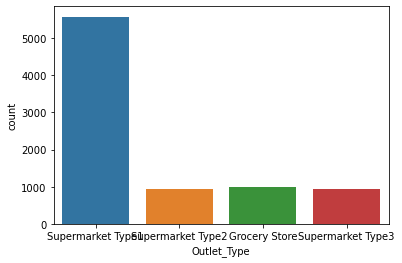

In [307]:
sns.countplot(df_train.Outlet_Type)

In [308]:
df_train.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Age                     0
dtype: int64

## Relationship between Dependent and Independent Variables

In [309]:
X = df_train[['Item_MRP','Item_Weight','Item_Visibility']]
y = df_train['Item_Outlet_Sales']

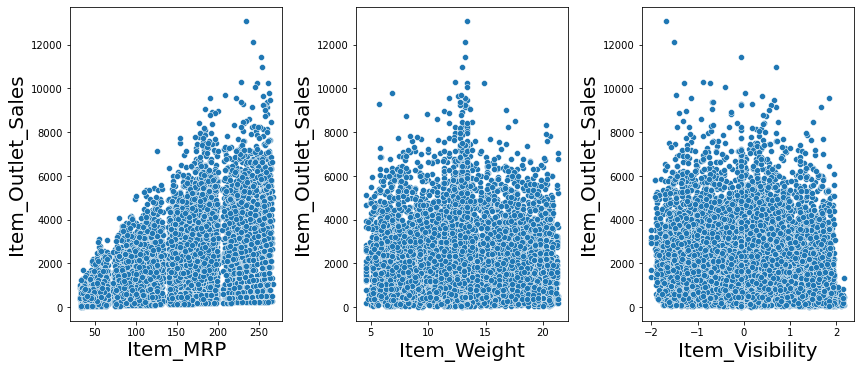

In [310]:
plt.figure(figsize=(20,25))
plotnum=1
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.scatterplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Item_Outlet_Sales',fontsize=20)
    plotnum+=1
plt.tight_layout()

**Finding:** There is a positive linear relationship between Item_Outlet_Sales and Item_MRP

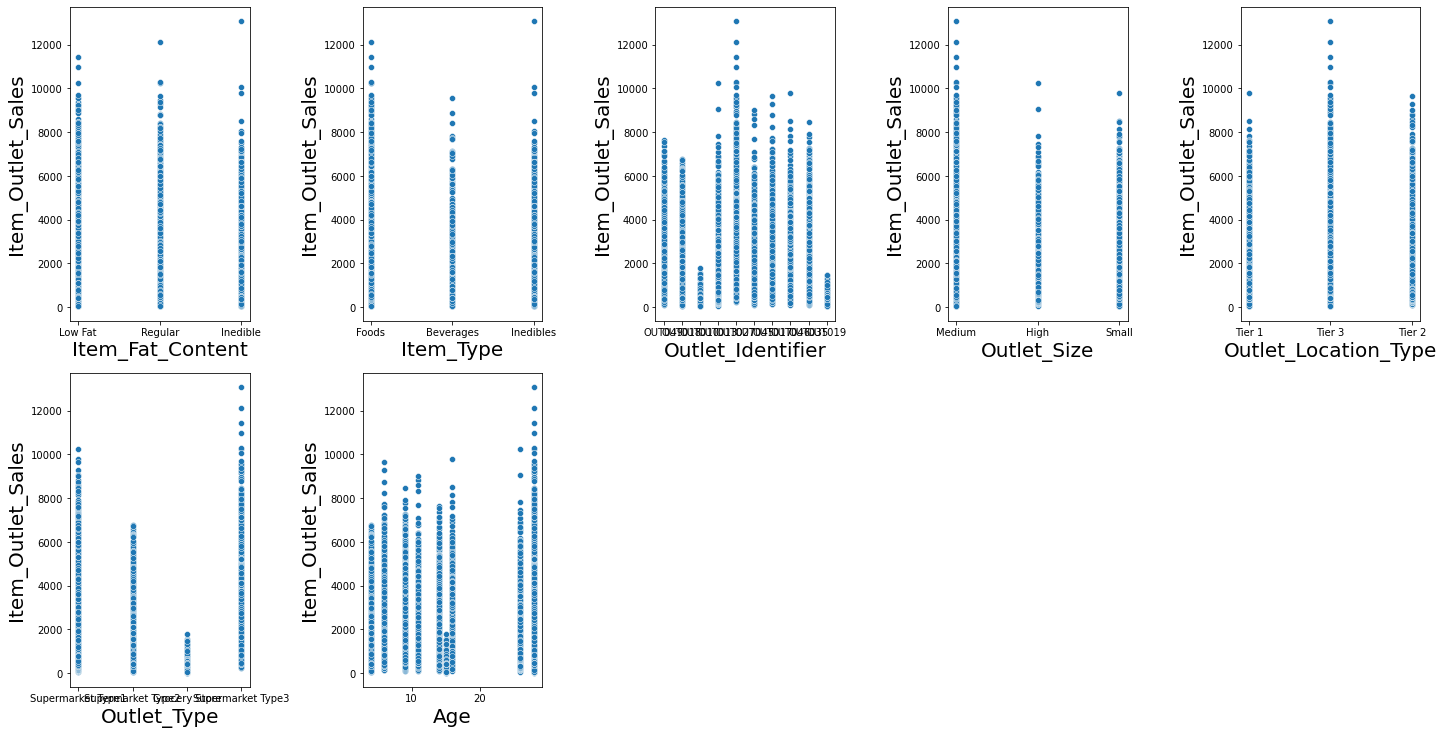

In [311]:
plt.figure(figsize=(20,25))
plotnum=1
y = df_train['Item_Outlet_Sales']
X = df_train.drop(columns=['Item_MRP','Item_Weight','Item_Visibility','Item_Outlet_Sales'])
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.scatterplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Item_Outlet_Sales',fontsize=20)
    plotnum+=1
plt.tight_layout()

**Finding:** 
1. There is a positive relation between Outlet_type and Item_Outlet_sales
2. Supermarket Type 3 generates maximum sales.
3. Older outlets typically generate more sales.
4. Tier 3 Outlets generate more sales.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

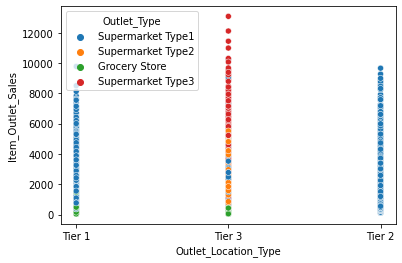

In [312]:
sns.scatterplot(data=df_train, x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type')

**Findings:**
1. Tier 3 Cities generate the most sales and have a good mix of Supermarket Type 2 and Type 3 along with Grocery stores
2. Tier 2 and Tier 1 cities have more of Supermarket Type1 with a few Grocery stores.
3. Outlet_Location_Type has a good relation with Item_Outlet_sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

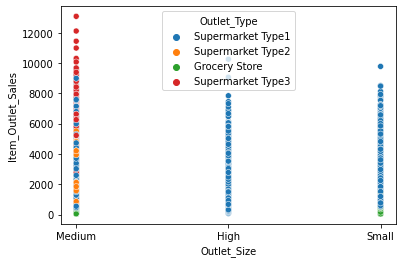

In [313]:
sns.scatterplot(data=df_train, x='Outlet_Size', y='Item_Outlet_Sales', hue='Outlet_Type')

**Findings:**
1. Medium Sized Outlets generate the Highest sales and are a mix of Supermaraket Type1,Type2,Type3 and Grocery Stores
2. High and small Sized Outlets comprise mostly of Supermarket Type1

## Encoding categorical columns

In [314]:
dumm = pd.get_dummies(df_train[['Outlet_Type','Outlet_Identifier']])
dumm

,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8423,0,1,0,0,0,1,0,0,0,0,0,0,0,0
8424,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8425,0,1,0,0,0,0,0,0,0,0,1,0,0,0
8426,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [315]:
dumm2 = pd.get_dummies(df_test[['Outlet_Type','Outlet_Identifier']],drop_first = False)
dumm2

,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5589,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5590,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5591,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5592,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [316]:
dm_train = df_train.copy()
dm_test = df_test.copy()

In [317]:
df_train = df_train.join(dumm)

In [318]:
df_train.drop(columns=['Outlet_Type','Outlet_Identifier'],inplace=True)

In [319]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Age,Outlet_Type_Grocery Store,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,Low Fat,-1.442725,Foods,249.8092,Medium,Tier 1,3735.1380,14,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,Regular,-1.309692,Beverages,48.2692,Medium,Tier 3,443.4228,4,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,Low Fat,-1.412983,Foods,141.6180,Medium,Tier 1,2097.2700,14,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,Regular,-0.051106,Foods,182.0950,Medium,Tier 3,732.3800,15,1,...,1,0,0,0,0,0,0,0,0,0
4,8.930,Inedible,-0.051106,Inedibles,53.8614,High,Tier 3,994.7052,26,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8423,6.865,Low Fat,-0.054236,Foods,214.5218,High,Tier 3,2778.3834,26,0,...,0,1,0,0,0,0,0,0,0,0
8424,8.380,Regular,-0.336739,Foods,108.1570,Medium,Tier 2,549.2850,11,0,...,0,0,0,0,0,0,0,1,0,0
8425,10.600,Inedible,-0.716902,Inedibles,85.1224,Small,Tier 2,1193.1136,9,0,...,0,0,0,0,0,0,1,0,0,0
8426,7.210,Regular,1.556591,Foods,103.1332,Medium,Tier 3,1845.5976,4,0,...,0,0,0,1,0,0,0,0,0,0


In [320]:
df_test = df_test.join(dumm2)

In [321]:
df_test.drop(columns=['Outlet_Type','Outlet_Identifier'],inplace=True)

In [322]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Age,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,20.75000,Low Fat,-1.833918,Foods,107.8622,Medium,Tier 1,14,0,1,...,0,0,0,0,0,0,0,0,0,1
1,8.30000,Regular,-0.608874,Foods,87.3198,Medium,Tier 2,6,0,1,...,0,0,1,0,0,0,0,0,0,0
2,14.60000,Inedible,0.930118,Inedibles,241.7538,Medium,Tier 3,15,1,0,...,1,0,0,0,0,0,0,0,0,0
3,7.31500,Low Fat,-1.485170,Foods,155.0340,Medium,Tier 2,6,0,1,...,0,0,1,0,0,0,0,0,0,0
4,12.95504,Regular,1.248922,Foods,234.2300,Medium,Tier 3,28,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5589,10.50000,Regular,-1.566897,Foods,141.3154,Small,Tier 1,16,0,1,...,0,0,0,0,0,0,0,0,1,0
5590,7.60000,Regular,1.581831,Foods,169.1448,Medium,Tier 3,4,0,0,...,0,0,0,1,0,0,0,0,0,0
5591,10.00000,Inedible,0.386391,Inedibles,118.7440,Medium,Tier 2,11,0,1,...,0,0,0,0,0,0,0,1,0,0
5592,15.30000,Regular,-0.012140,Foods,214.6218,Medium,Tier 2,6,0,1,...,0,0,1,0,0,0,0,0,0,0


In [323]:
df_train['Item_Fat_Content'] = df_train.Item_Fat_Content.map({'Inedible':1,'Low Fat':2,'Regular':3})
df_test['Item_Fat_Content'] = df_test.Item_Fat_Content.map({'Inedible':1,'Low Fat':2,'Regular':3})

df_train['Item_Type'] = df_train.Item_Type.map({'Inedibles':1,'Foods':2,'Beverages':3})
df_test['Item_Type'] = df_test.Item_Type.map({'Inedibles':1,'Foods':2,'Beverages':3})

df_train['Outlet_Size'] = df_train.Outlet_Size.map({'Small':1,'Medium':2,'High':3})
df_test['Outlet_Size'] = df_test.Outlet_Size.map({'Small':1,'Medium':2,'High':3})

df_train['Outlet_Location_Type'] = df_train.Outlet_Location_Type.map({'Tier 1':1,'Tier 2':2,'Tier 3':3})
df_test['Outlet_Location_Type'] = df_test.Outlet_Location_Type.map({'Tier 1':1,'Tier 2':2,'Tier 3':3})

In [324]:
df_train.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Age,Outlet_Type_Grocery Store,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30000,2,-1.442725,2,249.8092,2,1,3735.1380,14,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92000,3,-1.309692,3,48.2692,2,3,443.4228,4,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50000,2,-1.412983,2,141.6180,2,1,2097.2700,14,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20000,3,-0.051106,2,182.0950,2,3,732.3800,15,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93000,1,-0.051106,1,53.8614,3,3,994.7052,26,0,...,0,1,0,0,0,0,0,0,0,0
5,10.39500,3,-0.051106,2,51.4008,2,3,556.6088,4,0,...,0,0,0,1,0,0,0,0,0,0
6,13.65000,3,-1.583669,2,57.6588,3,3,343.5528,26,0,...,0,1,0,0,0,0,0,0,0,0
7,12.98788,2,1.334138,2,107.7622,2,3,4022.7636,28,0,...,0,0,0,0,0,1,0,0,0,0
8,16.20000,3,-1.416017,2,96.9726,2,2,1076.5986,11,0,...,0,0,0,0,0,0,0,1,0,0
9,19.20000,3,0.804238,2,187.8214,2,2,4710.5350,6,0,...,0,0,1,0,0,0,0,0,0,0


In [325]:
df_test.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Age,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,20.750000,2,-1.833918,2,107.8622,2,1,14,0,1,...,0,0,0,0,0,0,0,0,0,1
1,8.300000,3,-0.608874,2,87.3198,2,2,6,0,1,...,0,0,1,0,0,0,0,0,0,0
2,14.600000,1,0.930118,1,241.7538,2,3,15,1,0,...,1,0,0,0,0,0,0,0,0,0
3,7.315000,2,-1.485170,2,155.0340,2,2,6,0,1,...,0,0,1,0,0,0,0,0,0,0
4,12.955040,3,1.248922,2,234.2300,2,3,28,0,0,...,0,0,0,0,0,1,0,0,0,0
5,9.800000,3,0.145161,2,117.1492,1,1,16,0,1,...,0,0,0,0,0,0,0,0,1,0
6,19.350000,3,0.591727,2,50.1034,2,3,4,0,0,...,0,0,0,1,0,0,0,0,0,0
7,12.272418,2,-1.468349,2,81.0592,2,3,28,0,0,...,0,0,0,0,0,1,0,0,0,0
8,6.305000,3,1.320125,2,95.7436,2,2,11,0,1,...,0,0,0,0,0,0,0,1,0,0
9,5.985000,2,-1.921449,2,186.8924,2,2,6,0,1,...,0,0,1,0,0,0,0,0,0,0


## Establishing correlations

In [326]:
d_corr = df_train.corr()

In [327]:
d_corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Age,Outlet_Type_Grocery Store,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
Item_Weight,1.000000,-0.045034,-0.018078,-0.085976,0.025361,0.007040,0.004421,0.011071,0.008528,0.005884,...,0.006881,0.012003,-0.002897,0.000968,0.001073,-0.000954,-0.002682,-0.017554,0.000426,0.004628
Item_Fat_Content,-0.045034,1.000000,0.079416,0.595517,0.002461,0.000569,-0.003854,0.021665,-0.006646,-0.014052,...,-0.010909,-0.003253,0.004667,0.002903,-0.008292,0.001764,0.002200,-0.002999,-0.000442,0.009597
Item_Visibility,-0.018078,0.079416,1.000000,0.060248,-0.000300,-0.042087,-0.012939,-0.082427,0.036934,0.183355,...,0.123652,-0.027656,-0.016169,-0.016483,0.127573,-0.036528,-0.018895,-0.025616,-0.022097,-0.024756
Item_Type,-0.085976,0.595517,0.060248,1.000000,-0.022711,0.003214,-0.003181,-0.001645,-0.011005,-0.015579,...,-0.008894,-0.003375,0.005153,-0.001458,-0.012511,-0.001621,0.006981,0.006148,-0.007305,0.011492
Item_MRP,0.025361,0.002461,-0.000300,-0.022711,1.000000,-0.004075,0.003314,0.573491,-0.006989,-0.004335,...,0.004372,0.002434,-0.008884,0.003855,-0.010579,-0.006773,0.012024,-0.000259,0.006001,-0.003949
Outlet_Size,0.007040,0.000569,-0.042087,0.003214,-0.004075,1.000000,0.610106,0.079486,0.209482,-0.190911,...,0.070642,0.685584,0.097486,0.097605,-0.339545,0.098018,-0.489311,0.097664,-0.489311,0.097723
Outlet_Location_Type,0.004421,-0.003854,-0.012939,-0.003181,0.003314,0.610106,1.000000,0.087474,0.104085,-0.034632,...,0.277990,0.385026,-0.050070,0.384096,-0.336515,0.385722,-0.050192,-0.050161,-0.484944,-0.484944
Item_Outlet_Sales,0.011071,0.021665,-0.082427,-0.001645,0.573491,0.079486,0.087474,1.000000,0.060149,-0.398163,...,-0.277934,0.020061,0.028579,-0.042619,-0.267263,0.309205,0.048931,-0.001990,0.015666,0.030235
Age,0.008528,-0.006646,0.036934,-0.011005,-0.006989,0.209482,0.104085,0.060149,1.000000,0.268711,...,-0.002690,0.460445,-0.382111,-0.466765,0.377621,0.545825,-0.256599,-0.172202,0.038426,-0.045867
Outlet_Type_Grocery Store,0.005884,-0.014052,0.183355,-0.015579,-0.004335,-0.190911,-0.034632,-0.398163,0.268711,1.000000,...,0.698620,-0.128495,-0.128029,-0.128184,0.670640,-0.128727,-0.128340,-0.128262,-0.128340,-0.128340


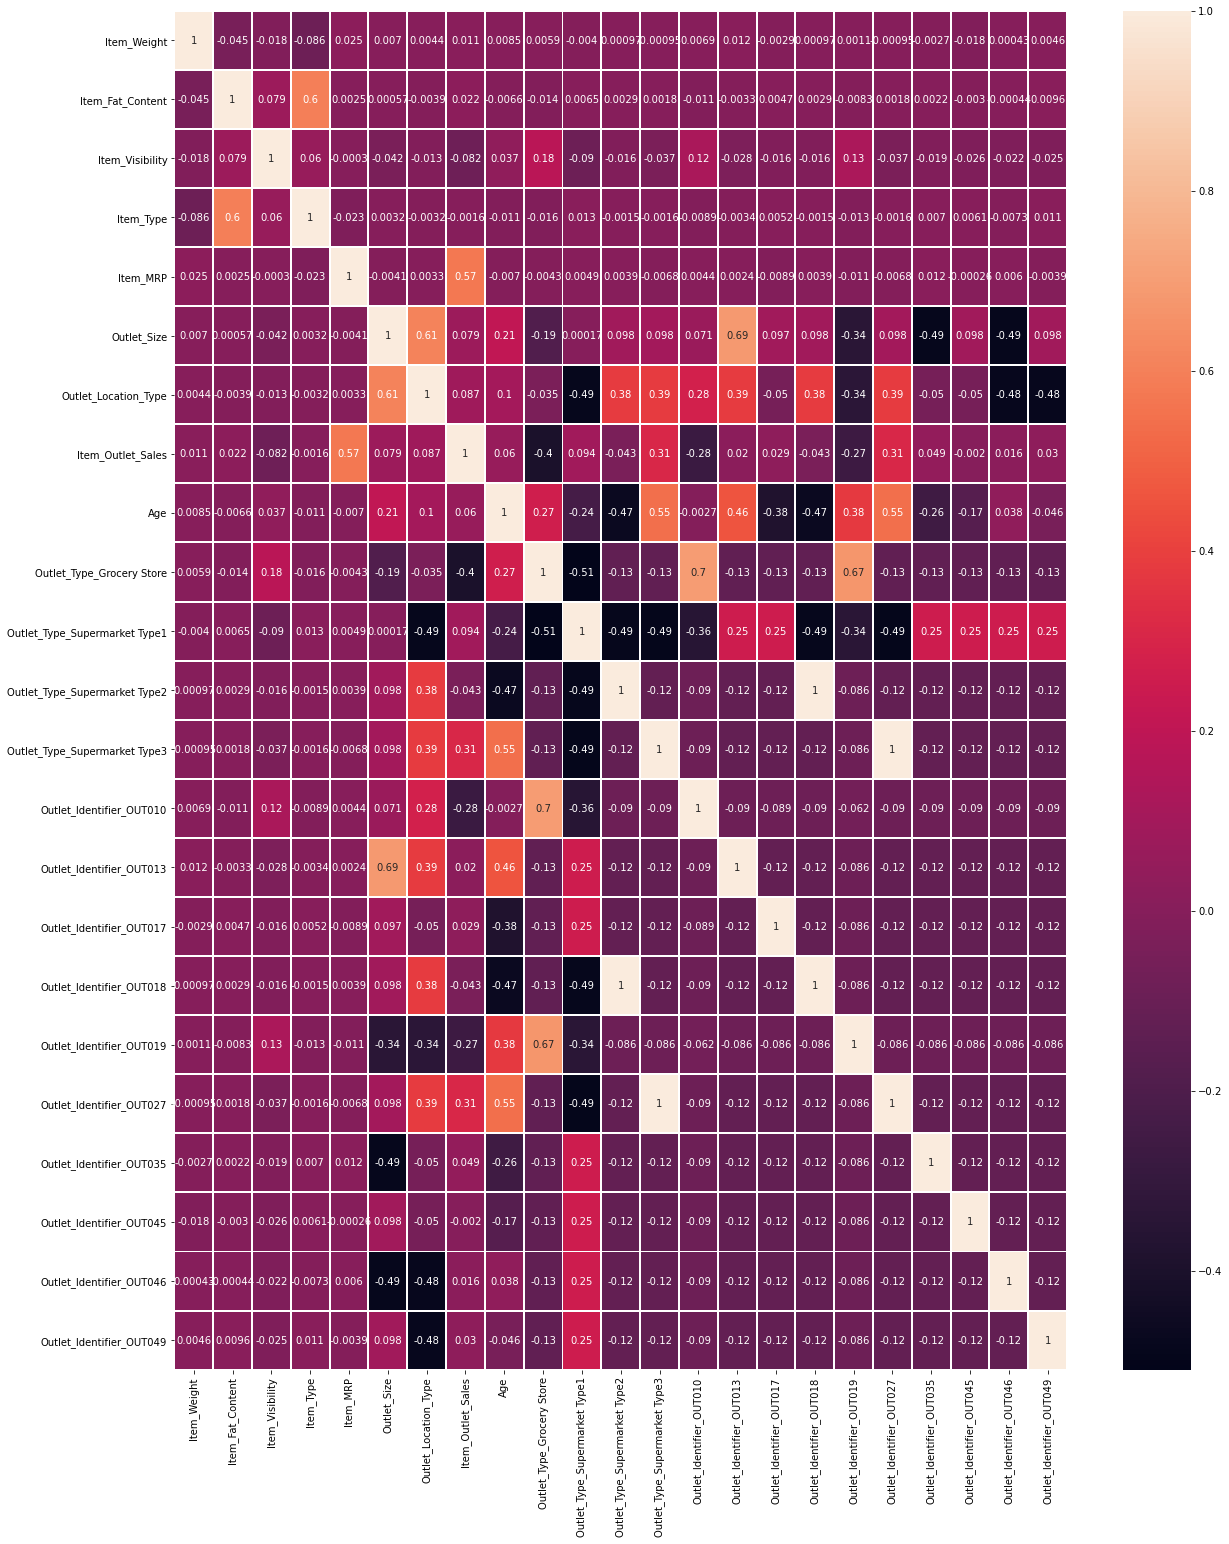

In [328]:
plt.figure(figsize=(20,25))
sns.heatmap(d_corr,annot=True,linewidth=1)
plt.show()

## Correlation of Features with label

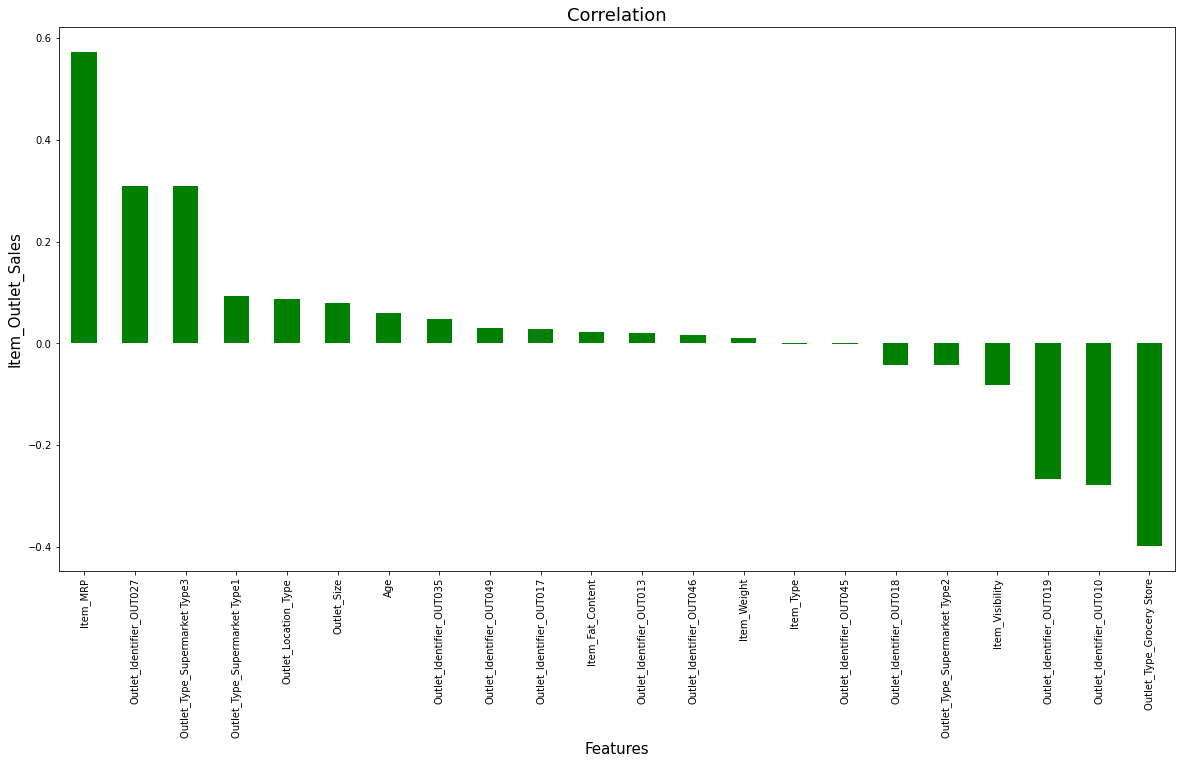

In [329]:
plt.figure(figsize = (20,10))
df_train.corr()['Item_Outlet_Sales'].sort_values(ascending = False).drop(['Item_Outlet_Sales']).plot(kind='bar',color = 'g')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Item_Outlet_Sales',fontsize=15)
plt.title('Correlation',fontsize = 18)
plt.show()

**Findings:**
1. Highest positive correlation with Item_Outlet_Sales - Item_MRP, Outlet_Type_Supermarket Type3, Outlet_Identifier_OUT027
2. Highest negative correlation with Item_Outlet_Sales - Outlet_Type_Grocery Store, Outlet_Identifier_OUT010, Outlet_Identifier_OUT019

## Feature Selection

In [330]:
X = df_train.drop(columns=['Item_Outlet_Sales'])
y = df_train['Item_Outlet_Sales']

In [331]:
scaler= StandardScaler()

In [332]:
scaled_X = scaler.fit_transform(X)

## Multicollinearity Check using VIF

In [333]:
vif = pd.DataFrame()

In [334]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [335]:
vif

,Features,vif
0,Item_Weight,1.008727
1,Item_Fat_Content,1.555450
2,Item_Visibility,1.042941
3,Item_Type,1.560243
4,Item_MRP,1.001892
5,Outlet_Size,inf
6,Outlet_Location_Type,inf
7,Age,inf
8,Outlet_Type_Grocery Store,inf
9,Outlet_Type_Supermarket Type1,inf


**Finding:** It appears that there is no multicollinearity

In [336]:
scaler= StandardScaler()
scaled_X_test = scaler.fit_transform(df_test)

In [337]:
scaled_X_test

array([[ 1.88543144, -0.222286  , -1.8339182 , ..., -0.35273518,
        -0.35305548,  2.83241604],
       [-1.03089002,  1.165513  , -0.60887447, ..., -0.35273518,
        -0.35305548, -0.35305548],
       [ 0.44483891, -1.610085  ,  0.93011846, ..., -0.35273518,
        -0.35305548, -0.35305548],
       ...,
       [-0.63267746, -1.610085  ,  0.38639056, ...,  2.83498795,
        -0.35305548, -0.35305548],
       [ 0.60880879,  1.165513  , -0.01214013, ..., -0.35273518,
        -0.35305548, -0.35305548],
       [-0.7497988 ,  1.165513  ,  1.02216198, ...,  2.83498795,
        -0.35305548, -0.35305548]])

## Selecting KBest Features

In [338]:
bestfeat = SelectKBest(score_func = f_classif, k = 22)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [339]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(22,'Score'))

                          Feature     Score
8       Outlet_Type_Grocery Store  4.241044
4                        Item_MRP  3.501741
16       Outlet_Identifier_OUT019  1.782798
12       Outlet_Identifier_OUT010  1.780568
11  Outlet_Type_Supermarket Type3  1.751242
17       Outlet_Identifier_OUT027  1.751242
9   Outlet_Type_Supermarket Type1  1.586932
7                             Age  1.214545
2                 Item_Visibility  1.161522
1                Item_Fat_Content  1.112132
3                       Item_Type  1.071789
0                     Item_Weight  1.041603
6            Outlet_Location_Type  1.035315
5                     Outlet_Size  1.004025
18       Outlet_Identifier_OUT035  1.000072
20       Outlet_Identifier_OUT046  0.984630
13       Outlet_Identifier_OUT013  0.984232
21       Outlet_Identifier_OUT049  0.981800
14       Outlet_Identifier_OUT017  0.939199
10  Outlet_Type_Supermarket Type2  0.891431
15       Outlet_Identifier_OUT018  0.891431
19       Outlet_Identifier_OUT04

In [340]:
xbest = X.drop(columns=['Outlet_Identifier_OUT018','Outlet_Identifier_OUT045'])

In [341]:
xbest

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Age,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,2,-1.442725,2,249.8092,2,1,14,0,1,0,0,0,0,0,0,0,0,0,1
1,5.920,3,-1.309692,3,48.2692,2,3,4,0,0,1,0,0,0,0,0,0,0,0,0
2,17.500,2,-1.412983,2,141.6180,2,1,14,0,1,0,0,0,0,0,0,0,0,0,1
3,19.200,3,-0.051106,2,182.0950,2,3,15,1,0,0,0,1,0,0,0,0,0,0,0
4,8.930,1,-0.051106,1,53.8614,3,3,26,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8423,6.865,2,-0.054236,2,214.5218,3,3,26,0,1,0,0,0,1,0,0,0,0,0,0
8424,8.380,3,-0.336739,2,108.1570,2,2,11,0,1,0,0,0,0,0,0,0,0,0,0
8425,10.600,1,-0.716902,1,85.1224,1,2,9,0,1,0,0,0,0,0,0,0,1,0,0
8426,7.210,3,1.556591,2,103.1332,2,3,4,0,0,1,0,0,0,0,0,0,0,0,0


In [342]:
xbest_ss = scaler.fit_transform(xbest)

In [343]:
x_best_test = df_test.drop(columns=['Outlet_Identifier_OUT018','Outlet_Identifier_OUT045'])

In [344]:
scaler= StandardScaler()
scaled_X_test = scaler.fit_transform(x_best_test)

## Model Building

In [345]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(xbest_ss,y,test_size = .25, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.5839286639366096 on random_state: 5


In [346]:
x_train,x_test,y_train,y_test = train_test_split(xbest_ss,y,test_size = .25, random_state = 5)

## Training the model

In [349]:
lr = LinearRegression()
rf = RandomForestRegressor()
svr = SVR()

In [350]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
svr.fit(x_train,y_train)

Lasso()

In [353]:
print("-"*50)
print("Linear Regression Model")
print("-"*50)
lr_pred = lr.predict(x_test)
print("R2 Score: ", r2_score(y_test,lr_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,lr_pred), "\n"*2)

print("-"*50)
print("Random Forest Model")
print("-"*50)
rf_pred = rf.predict(x_test)
print("R2 Score: ", r2_score(y_test,rf_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,rf_pred), "\n"*2)

print("-"*50)
print("Support Vector Regression Model")
print("-"*50)
svr_pred = svr.predict(x_test)
print("R2 Score: ", r2_score(y_test,svr_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,svr_pred), "\n"*2)

--------------------------------------------------
Linear Regression Model
--------------------------------------------------
R2 Score:  0.5856021622586116 

Mean Squared Error:  1247006.258618198 


--------------------------------------------------
Random Forest Model
--------------------------------------------------
R2 Score:  0.5840260370862485 

Mean Squared Error:  1251749.1355719364 


--------------------------------------------------
Support Vector Regression Model
--------------------------------------------------
R2 Score:  0.04570816731835914 

Mean Squared Error:  2871655.639875419 




## Model Cross Validation

In [354]:
print("Cross Validation Score for Linear Regression Model: ", cross_val_score(lr,xbest_ss,y,cv=5).mean(), "\n"*2)
print("Cross Validation Score for Random Forest Model: ", cross_val_score(rf,xbest_ss,y,cv=5).mean(), "\n"*2)
print("Cross Validation Score for Support Vector Regression Model: ", cross_val_score(svr,xbest_ss,y,cv=5).mean(), "\n"*2)

Cross Validation Score for Linear Regression Model:  0.5580173906012121 


Cross Validation Score for Random Forest Model:  0.5477686034438121 


Cross Validation Score for Support Vector Regression Model:  0.04970172826495691 




### From the R2 scores and Cross Validation Scores, it appears Linear Regression is the best model

In [356]:
best_mod = LinearRegression()
best_mod.fit(x_train,y_train)

LinearRegression()

In [357]:
lr_pred = best_mod.predict(x_test)

acc = r2_score(y_test,lr_pred)
print(acc*100)

58.56021622586116


## Saving the model

In [358]:
joblib.dump(best_mod,"Big_Data_Mart_Sales_Prediction.pkl")

['Big_Data_Mart_Sales_Prediction.pkl']